# Imports

In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import anndata as ad
import celltypist
import anndata as ad
from scipy import sparse
from anndata import AnnData
import celltypist

# load data

In [3]:
# read merged adata
adata = sc.read("/home/p/pohll/Desktop/MP/data/merged_data.h5ad")

In [4]:
alignment = celltypist.DistanceAlignment.load('/home/p/pohll/Desktop/MP/data/celltypist_alignment.pkl')

# harmonization using celltypist

## alignment 

In [58]:
alignment = celltypist.harmonize(adata, 'dataset', 'manual_celltype_annotation')


👀 Detected PCA coordinates in the object, will use these to calculate distances
🏆 Reordering datasets
🖇 Harmonizing cell types of tsukui and xie
🖇 Harmonizing cell types of misharin
🖇 Harmonizing cell types of peyser
🖇 Harmonizing cell types of schiller
🖋️ Reannotating cells
✅ Harmonization done!


In [59]:
alignment

Cross-dataset cell type alignment for 5 datasets
    base_distance: a cross-dataset distance object
    aligned_datasets: 'tsukui', 'xie', 'misharin', 'peyser', 'schiller'
    relation: data frame of the harmonization table
    reannotation: data frame of the reannotated cells ('dataset', 'cell_type', 'reannotation', 'group')

In [63]:
alignment.write('/home/p/pohll/Desktop/MP/data/celltypist_alignment.pkl')

In [64]:
alignment.relation

,tsukui,relation,xie,relation,misharin,relation,peyser,relation,schiller
0,Adventitial fibroblasts,∈,Myofibroblasts,∈,Myofibroblasts,∈,Adventitial fibroblasts,=,NONE
1,Aerocytes,=,Aerocytes,=,Aerocytes,∈,Endothelial,=,NONE
2,Alveolar fibroblasts,∈,Myofibroblasts,∈,Myofibroblasts,∈,Adventitial fibroblasts,=,NONE
3,B-cells,=,Dendritic cells Ccr7-hi,∈,B-cells,=,B-cells,=,NONE
4,Dendritic cells,=,Dendritic cells,=,Dendritic cells,=,Dendritic cells,=,NONE
5,Endothelial,=,Endothelial,=,Endothelial,∈,Endothelial,=,NONE
6,Myofibroblasts,=,NONE,=,UNRESOLVED,∈,Adventitial fibroblasts,=,NONE
7,NA,=,NK cells,=,NK cells,=,UNRESOLVED,=,NONE
8,NK cells,∋,Classical monocytes,∋,Classical monocytes,∈,Classical monocytes,=,NONE
9,NK cells,∋,Classical monocytes,∋,Non-classical monocytes,∈,Classical monocytes,=,NONE


In [65]:
alignment.reannotation

,dataset,cell_type,reannotation,group
ID,,,,
AAACCTGAGGACATTA-1_xie,xie,Myofibroblasts,Adventitial fibroblasts ∈ Myofibroblasts ∈ Myo...,Group1
AAACCTGCAGTCGTGC-1_xie,xie,Peribronchial fibroblasts,Peribronchial fibroblasts = Peribronchial fibr...,Group13
AAACCTGCATGAAGTA-1_xie,xie,Alveolar macrophages,UNRESOLVED = Alveolar macrophages = Alveolar m...,Group16
AAACCTGTCTCGCATC-1_xie,xie,Peribronchial fibroblasts,Peribronchial fibroblasts = Peribronchial fibr...,Group13
AAACGGGTCCTAGAAC-1_xie,xie,Peribronchial fibroblasts,Peribronchial fibroblasts = Peribronchial fibr...,Group13
...,...,...,...,...
29291_schiller,schiller,Alveolar fibroblasts,UNRESOLVED = UNRESOLVED = UNRESOLVED = UNRESOL...,Group20
29292_schiller,schiller,AT2,Epithelial = AT2 = AT2 ∈ Epithelial = AT2,Group7
29293_schiller,schiller,Alveolar fibroblasts,UNRESOLVED = UNRESOLVED = UNRESOLVED = UNRESOL...,Group20


In [79]:
alignment.reannotation["group"].unique()

array(['Group1', 'Group13', 'Group16', 'Group4', 'Group2', 'Group15',
       'Group3', 'Group6', 'Group5', 'Group18', 'Group7', 'Group12',
       'Group14', 'Group8', 'Group17', 'Group9', 'Group10', 'Group11',
       'Group21', 'Group19', 'Group20', 'Group22'], dtype=object)

In [66]:
adata.obs[['low_hierarchy', 'high_hierarchy']] = alignment.reannotation.loc[adata.obs_names, ['reannotation', 'group']]

## visualize alignment distances 

In [6]:
dist_mat = alignment.base_distance.to_meta()
member_mat = alignment.base_distance.to_meta(turn_binary = True)

In [71]:
plt.figure(figsize=(3,3))

<Figure size 300x300 with 0 Axes>

<Figure size 300x300 with 0 Axes>

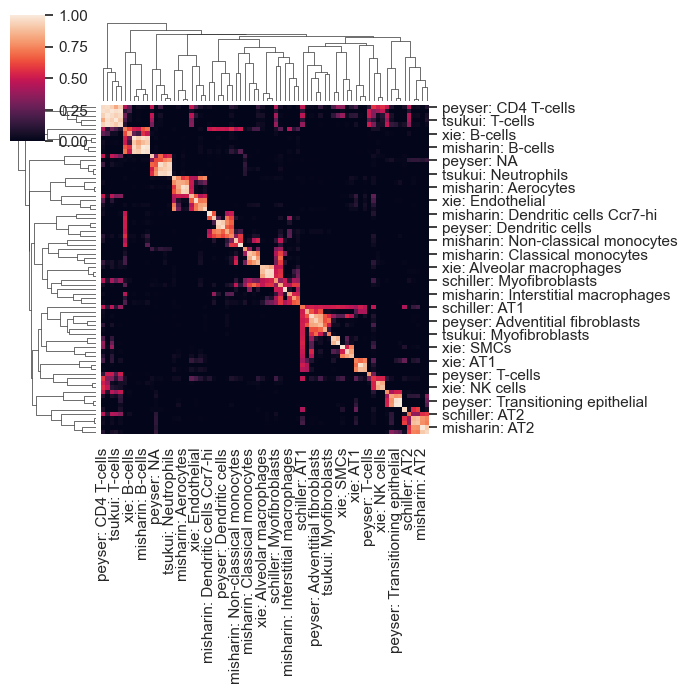

In [74]:
sns.clustermap(member_mat, figsize=(7, 7))

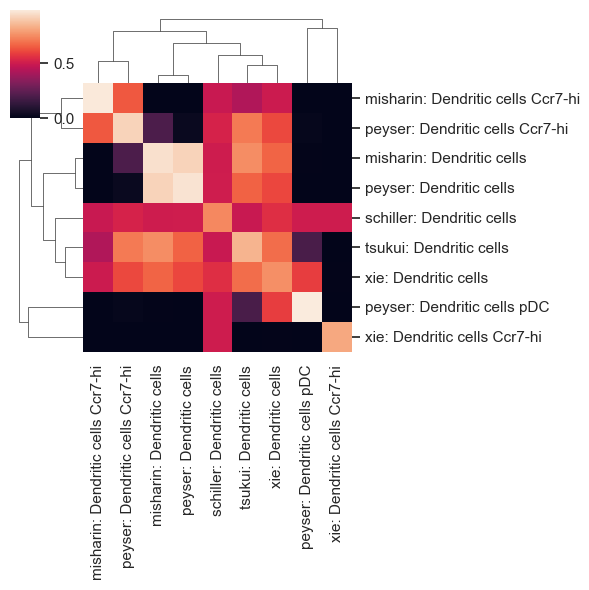

In [76]:
flag = member_mat.index.str.contains('Dendritic')
sns.clustermap(member_mat.loc[flag,flag], figsize=(6, 6))

## alignment treeplot

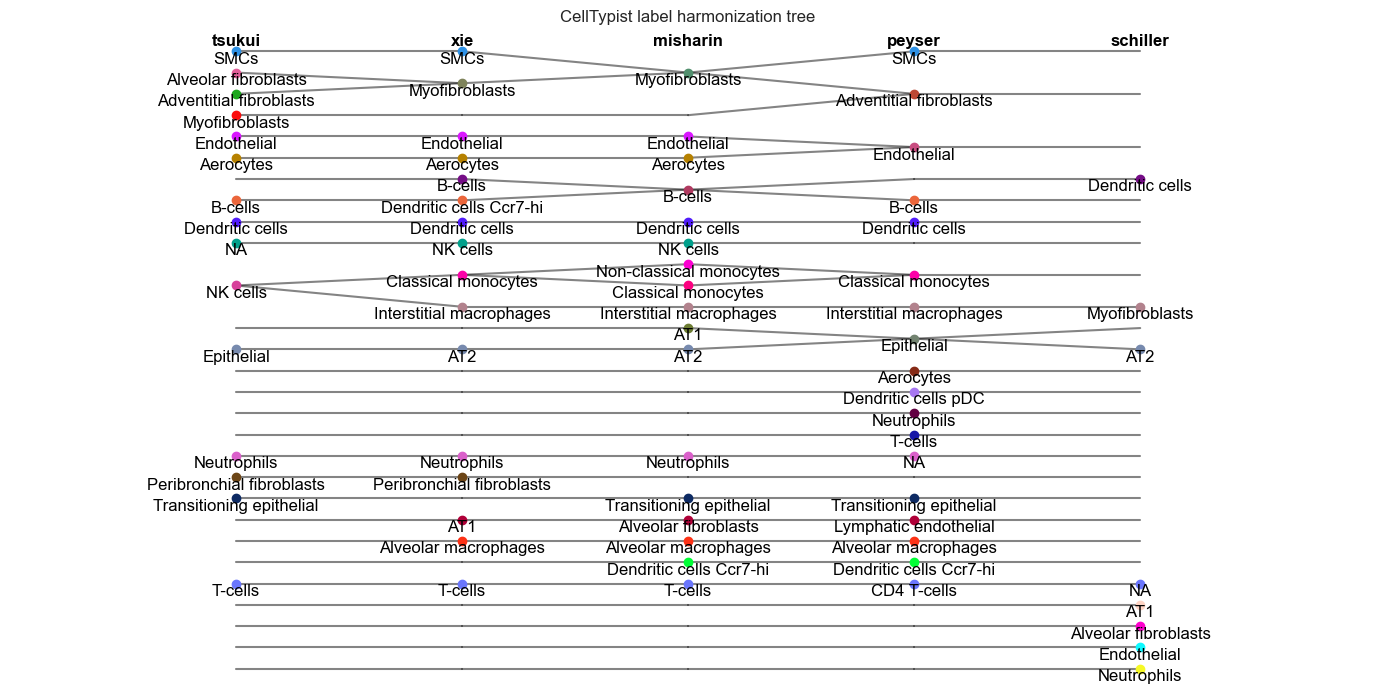

In [77]:
celltypist.treeplot(alignment)

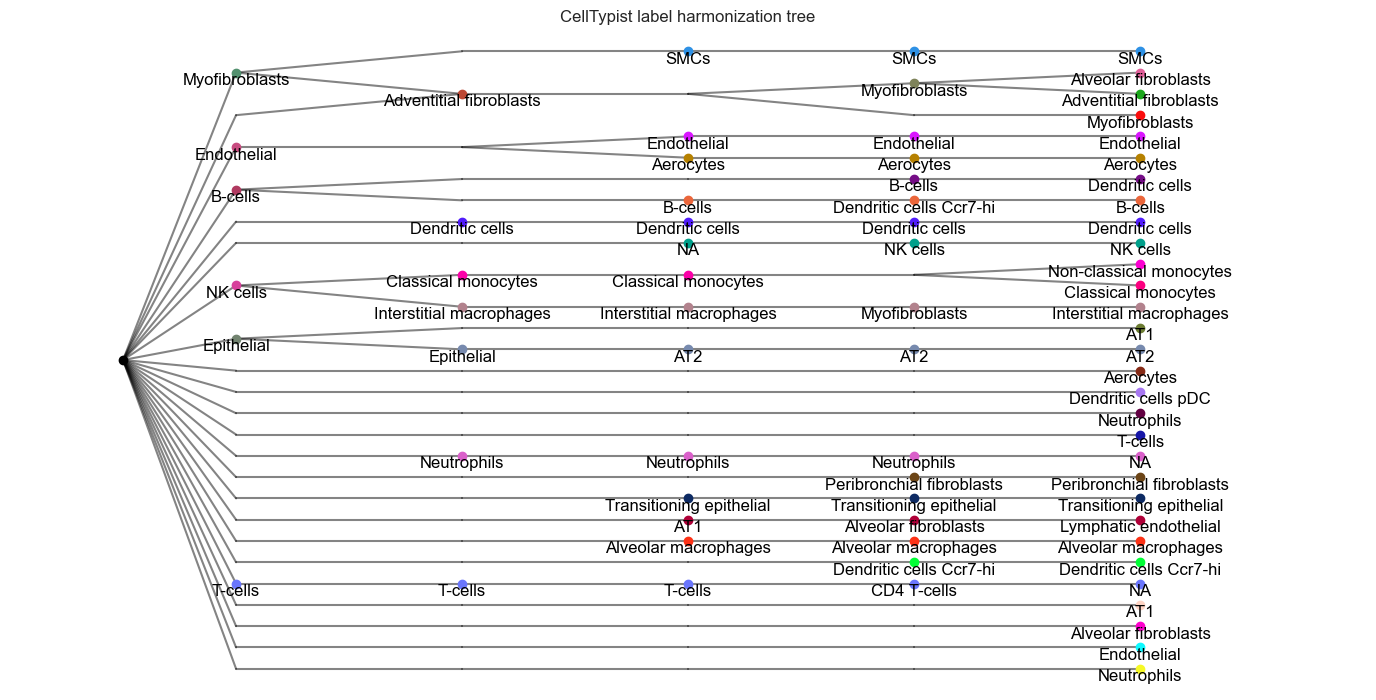

In [78]:
celltypist.treeplot(alignment, order_dataset = True)

In [92]:
alignment

Cross-dataset cell type alignment for 5 datasets
    base_distance: a cross-dataset distance object
    aligned_datasets: 'tsukui', 'xie', 'misharin', 'peyser', 'schiller'
    relation: data frame of the harmonization table
    reannotation: data frame of the reannotated cells ('dataset', 'cell_type', 'reannotation', 'group')

## check poorly/non mapping populations 

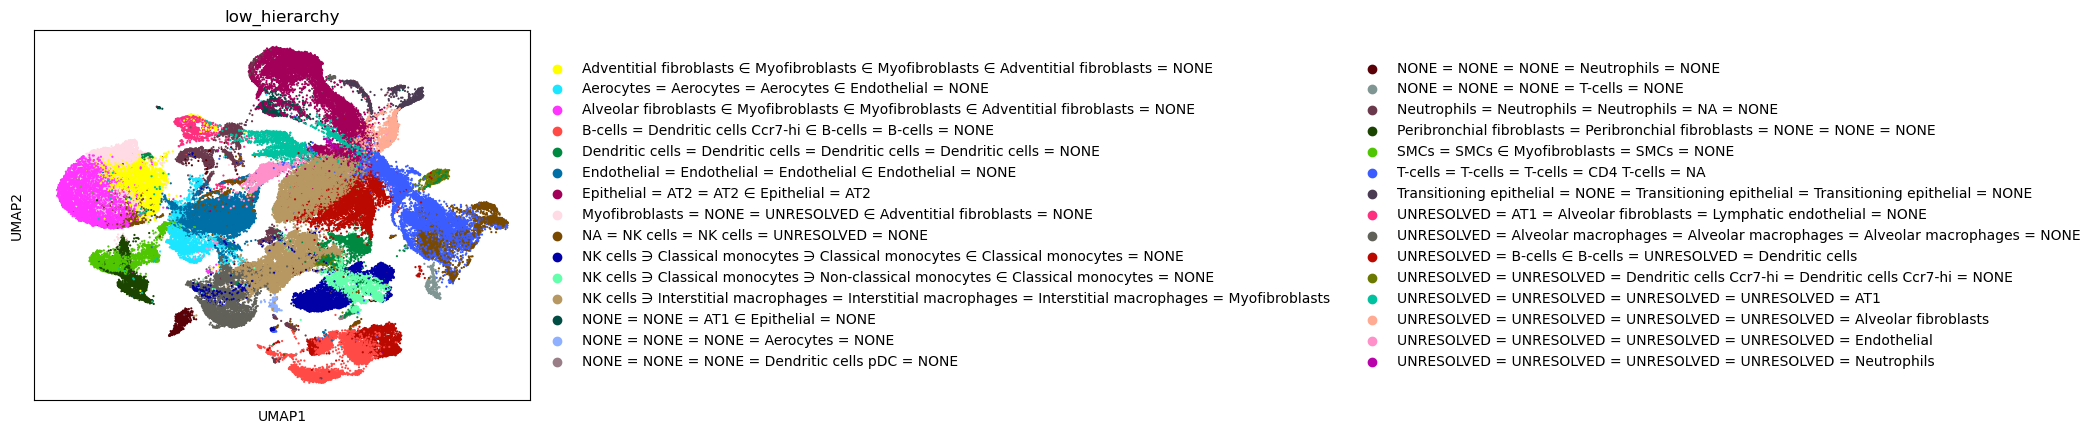

In [10]:
sc.pl.umap(adata, color=['low_hierarchy'], size=10)

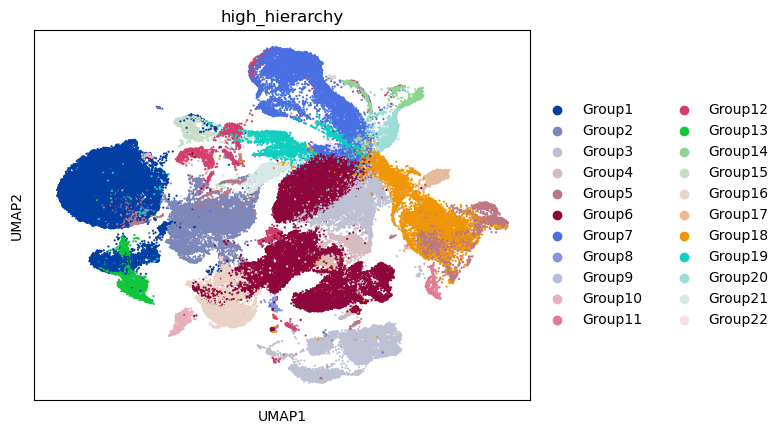

In [11]:
sc.pl.umap(adata, color=['high_hierarchy'], size=10)

Alveolar fbroblasts, schiller AT1 + Endothelial + Neutrophils, xie AP1, 

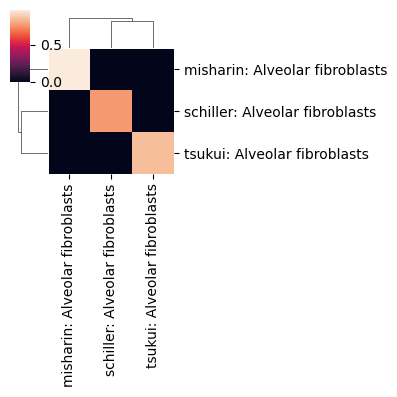

In [9]:
flag = member_mat.index.str.contains('Alveolar fibroblasts')
sns.clustermap(member_mat.loc[flag,flag], figsize=(4, 4))

In [80]:
import plotly.io as pio
pio.renderers.default = "iframe"

In [93]:
#alignment = celltypist.DistanceAlignment.load('/home/p/pohll/Desktop/MP/data/celltypist_alignment.pkl')
#celltypist.sankeyplot(alignment)

In [95]:
adata.write("/home/p/pohll/Desktop/MP/data/merged_data.h5ad")

... storing 'low_hierarchy' as categorical
... storing 'high_hierarchy' as categorical


In [98]:
adata

AnnData object with n_obs × n_vars = 93103 × 32317
    obs: 'author_annotation', 'scDblFinder_score', 'scDblFinder_class', 'manual_celltype_annotation', 'batch', 'condition', 'doublet_score', 'predicted_doublet', 'timepoint', 'author_annotation_coarse', 'dataset', 'fibrotic/control', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'low_hierarchy', 'high_hierarchy'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'log1p', 'hvg', 'pca', 'dataset_colors', 'neighbors', 'umap', 'manual_celltype_annotation_colors